# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [251]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [252]:
penguins_df.shape

(344, 5)

In [253]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


## Dealing With Null Values and Outliers

In [254]:
penguins_df.isnull().sum()
penguins_df = penguins_df.dropna()

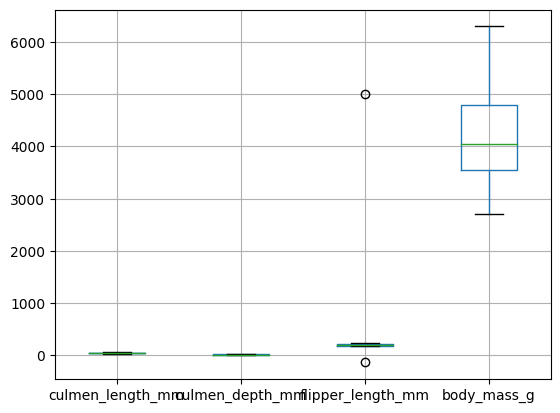

In [255]:
penguins_df.boxplot()
plt.show()

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9              42.0             20.2             5000.0       4250.0  MALE     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
14              34.6             21.1             -132.0       4400.0  MALE


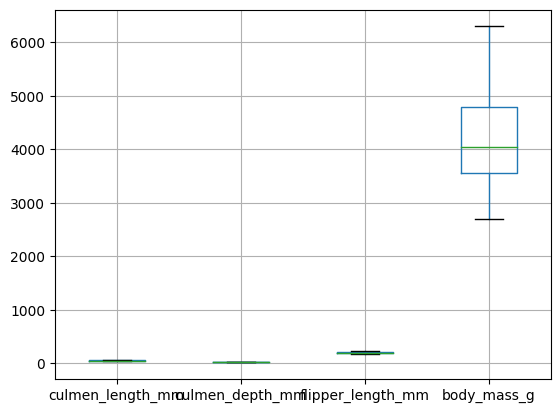

In [256]:
print(penguins_df[penguins_df['flipper_length_mm']>4000],
penguins_df[penguins_df['flipper_length_mm']<0])

penguins_clean = penguins_df.drop([9, 14])
penguins_clean.head()
penguins_clean.boxplot()
plt.show()

## Preproceesing ( Dummy)

In [257]:
penguins_dummies = pd.get_dummies(penguins_clean).drop("sex_.", axis =1)
penguins_dummies.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1


## Feature Scaling

In [258]:
scaler = StandardScaler()
X = scaler.fit_transform(penguins_dummies)
penguins_preprocessed = pd.DataFrame(data = X, columns= penguins_dummies.columns)
penguins_preprocessed.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


## Perform PCA

In [259]:
pca = PCA()
X_pca = pca.fit_transform(penguins_preprocessed)
explained_variance_ratio = pca.explained_variance_ratio_

n_components = sum(explained_variance_ratio > 0.1)
pca = PCA( n_components= n_components)
penguins_pca = pca.fit_transform(penguins_preprocessed)
print("Number of components:", n_components)

Number of components: 2


## K-Means

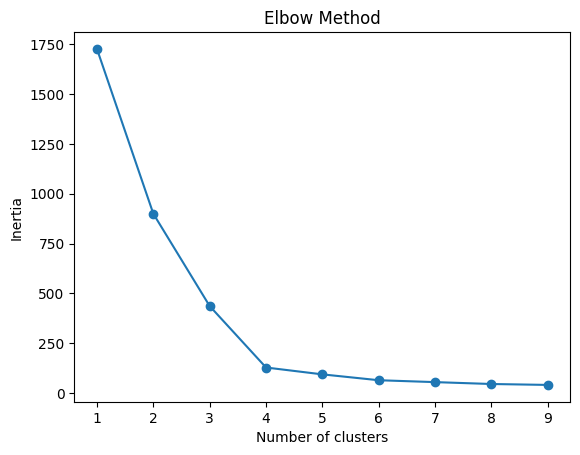

In [260]:
inertia = []
for n_clusters in range (1,10):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42).fit(penguins_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [261]:
n_clusters = 4

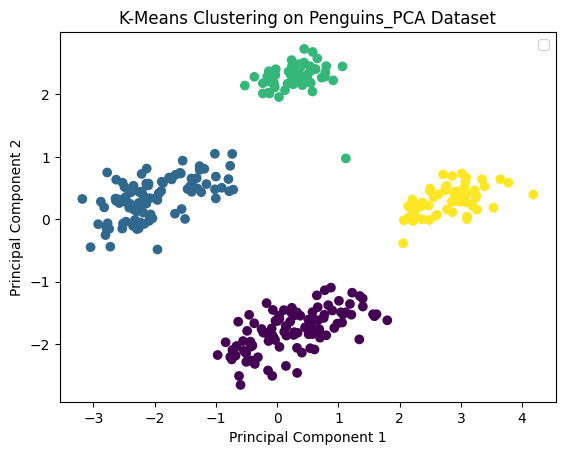

In [262]:
kmeans = KMeans(n_clusters=n_clusters, random_state = 42)
kmeans.fit(penguins_pca)
plt.scatter(penguins_pca[:, 0], penguins_pca[:, 1], c=kmeans.labels_, cmap="viridis")
plt.title('K-Means Clustering on Penguins_PCA Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [263]:

penguins_clean['label']= kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
                  'label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()

stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984
